In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

#-----------------------  prepare the train and test data ------------------ #

def read_data(file_path):
    datas = []
    labels = []
    with open(file_path, 'r') as f:
            lines = f.readlines()
            for line in lines:
                line = line.rstrip("\n").split(" ")
                data = []
                data.append(float(line[0])/100) # transform x1
                data.append(float(line[1]))
                datas.append(data)
                labels.append(float(line[2])/100) # transform y
    return np.array(datas), np.array(labels)


train_file = "./dataForTraining.txt"
test_file = "./dataForTesting.txt"

train_data, train_label = read_data(train_file)
test_data, test_label = read_data(test_file)

# z-score 
# train_data = preprocessing.scale(train_data)
# test_data = preprocessing.scale(test_data)

# min - max 
#train_data = [(i - np.min(train_data))* 1.0 / (np.max(train_data) - np.min(train_data)) for i in train_data]
#test_data = [(i - np.min(test_data))* 1.0 / (np.max(test_data) - np.min(test_data)) for i in test_data]
#print(train_data)

In [22]:
def show_curve(xs, ys1, ys2, title, label1, label2):
    x = np.array(xs)
    y1 = np.array(ys1)
    y2 = np.array(ys2)
    fig, ax = plt.subplots()
    ax.plot(x, y1, label = label1)
    ax.plot(x, y2, label = label2)
    plt.title('{} Curve:'.format(title))
    plt.xlabel('Epoch')
    plt.ylabel('{} Value'.format(title))
    ax.legend()
    #plt.show()

# 线性回归类

In [6]:
#------------------------- define the linear regression class --------#

class LinearRegression:
    def __init__(self, w1, w2, b, lr, step, test_data, test_label):
        self.w1 = w1
        self.w2 = w2
        self.b = b
        self.lr = lr
        self.step = step
        self.test_data = test_data
        self.test_label = test_label
    
    def fit(self, train_data, train_label, epoches,  train_method = "BGD"):
        if train_method == "BGD":
            return self.fit_by_BGD(train_data, train_label, epoches)
        elif train_method == "SGD":
            return self.fit_by_SGD(train_data, train_label, epoches)
    
    def loss_fn(self, data, label):
        loss  = 0.0
        for  i in range(len(data)):
            loss += (self.w1 * data[i][0] + self.w2 * data[i][1] + self.b - label[i])**2
        loss /= len(label) * 2
        return loss
    
    def cal_grad(self, data, label, var_type, item_pos):
        grad = 0.0
        if var_type == "constant":  # common item
            for i in range(len(data)):
                grad += self.w1 * data[i][0] + self.w2 * data[i][1] + self.b - label[i]
        elif var_type == "one": # once item
            for i in range(len(data)):
                grad += (self.w1 * data[i][0] + self.w2 * data[i][1] + self.b - label[i]) * data[i][item_pos]
        grad /= len(data)
        return grad
    
    def fit_by_BGD(self, train_data, train_label, epoches):
        train_losses = []
        test_losses = []
        x_epoch = []
        for epoch in range(epoches):
            grad_w1 = self.cal_grad(train_data, train_label, "one", 0)
            grad_w2 = self.cal_grad(train_data, train_label, "one", 1)
            grad_b = self.cal_grad(train_data, train_label, "constant", -1) # -1 make no sense
           
            self.w1 = self.w1 - self.lr * grad_w1
            self.w2 = self.w2 - self.lr * grad_w2
            self.b = self.b - self.lr * grad_b
            if (epoch + 1) % self.step == 0:
                train_loss = self.loss_fn(train_data, train_label)
                test_loss = self.loss_fn(self.test_data, self.test_label)
                train_losses.append(train_loss)
                test_losses.append(test_loss)
                x_epoch.append(epoch + 1)
                print("Epoch: {} / {}: train loss: {:.4f}  test loss:{:.4f}".format(epoch+1, epoches, train_loss, test_loss))
        self.show_param()
        return train_losses, test_losses, x_epoch
    
    def fit_by_SGD(self, train_data, train_label, epoches):
        dataset = []
        train_losses = []
        test_losses = []
        x_epoch = []
        for i in range(len(train_data)):
                data = list(train_data[i])
                data.append(train_label[i])
                dataset.append(data)
        dataset = np.array(dataset)
        for epoch in range(epoches):
            np.random.shuffle(dataset)
            for i in range(len(dataset)):
                X = [list(dataset[i][:-1])]
                y  = [dataset[i][-1]]
                grad_w1 = self.cal_grad(X, y, "one", 0)
                grad_w2 = self.cal_grad(X, y, "one", 1)
                grad_b = self.cal_grad(X, y, "constant", -1) # -1 make no sense
                self.w1 = self.w1 - self.lr * grad_w1
                self.w2 = self.w2 - self.lr * grad_w2
                self.b = self.b - self.lr * grad_b
            if (epoch + 1) % self.step == 0:
                train_loss = self.loss_fn(train_data, train_label)
                test_loss = self.loss_fn(self.test_data, self.test_label)
                train_losses.append(train_loss)
                test_losses.append(test_loss)
                x_epoch.append(epoch + 1)
                print("Epoch: {} / {}: train loss: {:.4f}  test loss:{:.4f}".format(epoch+1, epoches, train_loss, test_loss))
        self.show_param()
        return  train_losses, test_losses, x_epoch
    
    def predict(self, data):
        result = []
        for i in range(len(data)):
            result.append(data[i][0] * self.w1 + data[i][1] * self.w2 + self.b)
        return result
    
    def score(self ,result, label):
        error = 0.0
        for i in range(len(result)):
            error += (result[i] - label[i])**2
        return error / len(result)
    
    def show_param(self):
        print(self.w1, self.w2, self.b)

# Ex 1  

Epoch: 100000 / 1500000: train loss: 0.1262  test loss:0.0744
Epoch: 200000 / 1500000: train loss: 0.0562  test loss:0.0369
Epoch: 300000 / 1500000: train loss: 0.0251  test loss:0.0199
Epoch: 400000 / 1500000: train loss: 0.0112  test loss:0.0124
Epoch: 500000 / 1500000: train loss: 0.0051  test loss:0.0091
Epoch: 600000 / 1500000: train loss: 0.0024  test loss:0.0077
Epoch: 700000 / 1500000: train loss: 0.0012  test loss:0.0071
Epoch: 800000 / 1500000: train loss: 0.0006  test loss:0.0068
Epoch: 900000 / 1500000: train loss: 0.0004  test loss:0.0067
Epoch: 1000000 / 1500000: train loss: 0.0003  test loss:0.0067
Epoch: 1100000 / 1500000: train loss: 0.0002  test loss:0.0067
Epoch: 1200000 / 1500000: train loss: 0.0002  test loss:0.0067
Epoch: 1300000 / 1500000: train loss: 0.0002  test loss:0.0067
Epoch: 1400000 / 1500000: train loss: 0.0002  test loss:0.0067
Epoch: 1500000 / 1500000: train loss: 0.0002  test loss:0.0067
6.754087612408595 -0.7235582750277603 0.8015116764944286


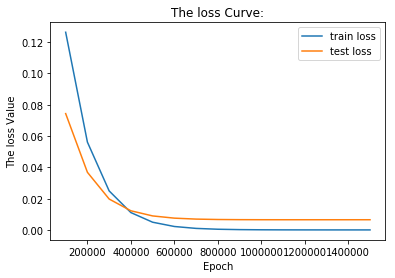

In [24]:
# --------------------------- hypermeter setting--------------------#
EPOCHES = 1500000
learning_rate = 0.00015

#---------------------------- initial parameter setting -------------#
# y = w1x1 + w2x2 + b
w1 = 0.0
w2 = 0.0
b = 0.0
step = 100000

LR = LinearRegression(w1, w2, b, learning_rate, step, test_data, test_label)
train_losses, test_losses, x_epoch = LR.fit(train_data, train_label, EPOCHES, "BGD")
show_curve(x_epoch, train_losses, test_losses, "The loss", "train loss", "test loss")

# Ex 2

Epoch: 100000 / 1500000: train loss: 0.0964  test loss:0.0589
Epoch: 200000 / 1500000: train loss: 0.0328  test loss:0.0241
Epoch: 300000 / 1500000: train loss: 0.0112  test loss:0.0124
Epoch: 400000 / 1500000: train loss: 0.0039  test loss:0.0085
Epoch: 500000 / 1500000: train loss: 0.0015  test loss:0.0072
Epoch: 600000 / 1500000: train loss: 0.0006  test loss:0.0068
Epoch: 700000 / 1500000: train loss: 0.0003  test loss:0.0067
Epoch: 800000 / 1500000: train loss: 0.0002  test loss:0.0067
Epoch: 900000 / 1500000: train loss: 0.0002  test loss:0.0067
Epoch: 1000000 / 1500000: train loss: 0.0002  test loss:0.0067
Epoch: 1100000 / 1500000: train loss: 0.0002  test loss:0.0067
Epoch: 1200000 / 1500000: train loss: 0.0002  test loss:0.0067
Epoch: 1300000 / 1500000: train loss: 0.0002  test loss:0.0067
Epoch: 1400000 / 1500000: train loss: 0.0002  test loss:0.0067
Epoch: 1500000 / 1500000: train loss: 0.0002  test loss:0.0067
6.760904789760574 -0.7237758374402526 0.7955432777219998


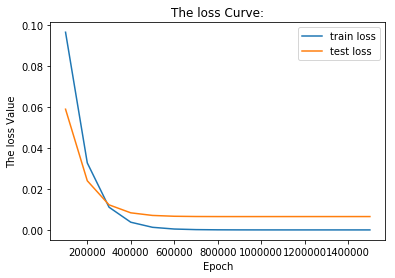

In [25]:
# --------------------------- hypermeter setting--------------------#
EPOCHES = 1500000
learning_rate = 0.0002

#---------------------------- initial parameter setting -------------#
# y = w1x1 + w2x2 + b
w1 = 0.0
w2 = 0.0
b = 0.0
step = 100000 

LR = LinearRegression(w1, w2, b, learning_rate, step, test_data, test_label)
train_losses, test_losses, x_epoch = LR.fit(train_data, train_label, EPOCHES, "BGD")
show_curve(x_epoch, train_losses, test_losses, "The loss", "train loss", "test loss")

 # Ex 3

Epoch: 10000 / 150000: train loss: 0.0051  test loss:0.0091
Epoch: 20000 / 150000: train loss: 0.0003  test loss:0.0067
Epoch: 30000 / 150000: train loss: 0.0002  test loss:0.0067
Epoch: 40000 / 150000: train loss: 0.0002  test loss:0.0067
Epoch: 50000 / 150000: train loss: 0.0002  test loss:0.0067
Epoch: 60000 / 150000: train loss: 0.0002  test loss:0.0067
Epoch: 70000 / 150000: train loss: 0.0002  test loss:0.0067
Epoch: 80000 / 150000: train loss: 0.0002  test loss:0.0067
Epoch: 90000 / 150000: train loss: 0.0002  test loss:0.0067
Epoch: 100000 / 150000: train loss: 0.0002  test loss:0.0067
Epoch: 110000 / 150000: train loss: 0.0002  test loss:0.0067
Epoch: 120000 / 150000: train loss: 0.0002  test loss:0.0067
Epoch: 130000 / 150000: train loss: 0.0002  test loss:0.0067
Epoch: 140000 / 150000: train loss: 0.0002  test loss:0.0067
Epoch: 150000 / 150000: train loss: 0.0002  test loss:0.0067
6.7619577860318785 -0.723815742328031 0.7946307602927977


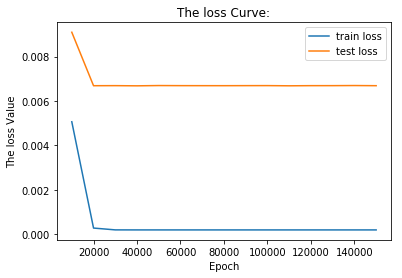

In [26]:
# --------------------------- hypermeter setting--------------------#
EPOCHES = 150000
learning_rate = 0.00015

#---------------------------- initial parameter setting -------------#
# y = w1x1 + w2x2 + b
w1 = 0.0
w2 = 0.0
b = 0.0
step = 10000
method = "SGD"
LR = LinearRegression(w1, w2, b, learning_rate, step, test_data, test_label)
train_losses, test_losses, x_epoch = LR.fit(train_data, train_label, EPOCHES, method)
show_curve(x_epoch, train_losses, test_losses, "The loss", "train loss", "test loss")